In [3]:
import utils_show as utils
import numpy as np
from pattern.en import lemma
from collections import defaultdict
from nltk.corpus import wordnet as wn

In [4]:
rc_captions = utils.read_json_file('data/relative_clause_synonym.json')
len(rc_captions)

close file...


835

## Note:
double check the code that generate sentences: alien
re-generate the image set

## Entity noun counts

In [5]:
from nltk.corpus import wordnet as wn

def get_subject_noun(sentence):
    tokens = sentence.split()
    for token in tokens:
        if token == "who":
            break
        if token == "forward":
            continue
        
        synsets = wn.synsets(token)
        if token == "person" or \
            (len(synsets) > 0 and \
            synsets[0].lexname() == 'noun.person'):
            return token
    
    return ""

In [6]:
entity_cnt = defaultdict(int)
entity_pairs = defaultdict(int)
entity_ids = defaultdict(set)
entity_pair_ids = defaultdict(set)

for img in rc_captions:
    id = img['image_id']
    caption = img['caption_group'][0]
    entity_1= get_subject_noun(caption['True1'])
    entity_2= get_subject_noun(caption['True2'])
    
    entity_cnt[entity_1] += 1
    entity_cnt[entity_2] += 1
    
    entity_ids[entity_1].add(id)
    entity_ids[entity_2].add(id)

    if entity_1 != entity_2:
        entity_pair = ', '.join(sorted([entity_1, entity_2]))
        entity_pairs[entity_pair] += 1
        entity_pair_ids[entity_pair].add(id)

In [7]:
print(sorted(entity_cnt.items(),key = lambda x: x[1], reverse=True))
len(entity_cnt)

[('person', 984), ('man', 422), ('woman', 129), ('boy', 36), ('girl', 32), ('player', 12), ('guy', 12), ('lady', 9), ('child', 8), ('skier', 6), ('surfer', 4), ('snowboarder', 4), ('kid', 4), ('passenger', 2), ('motorcyclist', 2), ('skateboarder', 2), ('baby', 2)]


17

In [10]:
print(entity_ids['motorcyclist'])

{2403437}


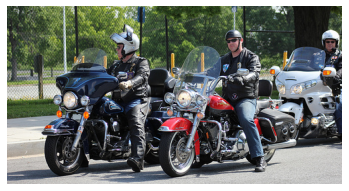

2403437
the motorcyclist who rides a black motorcycle wears a gray helmet
the motorcyclist who wears a black outfit has a red motorcycle
the motorcyclist who rides a black motorcycle has a red motorcycle
the motorcyclist who wears a black outfit wears a gray helmet


157

In [12]:
utils.demo_by_img_id(2403437, rc_captions)

In [13]:
print(sorted(entity_pairs.items(),key = lambda x: x[1], reverse=True))
len(entity_pairs)

[('guy, man', 4), ('lady, woman', 1)]


2

## Check images

In [14]:
# selected_pairs = ['forward, man']
selected_pairs = ['child, woman']
# selects = np.random.randint(0, len(rc_captions), n_demo)

child, woman


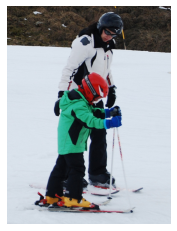

2396420
the woman who helps a child wears a black helmet
the child who holds white ski poles wears a green coat
the woman who helps a child wears a green coat
the child who holds white ski poles wears a black helmet


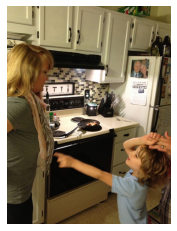

2353545
the child who wears a blue shirt points at a woman
the woman who wears a scarf stands in a kitchen
the child who wears a blue shirt stands in a kitchen
the woman who wears a scarf points at a woman


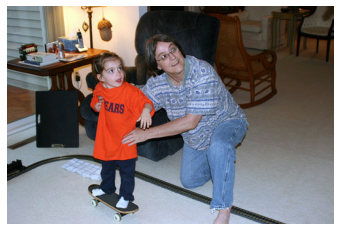

2353642
the woman who wears jeans wears a blue shirt
the child who wears a tshirt wears socks
the woman who wears jeans wears socks
the child who wears a tshirt wears a blue shirt


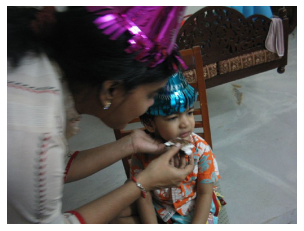

2400493
the woman who wears a white with red shirt has on a purple hat
the child who wears a blue hat wears a colorful shirt
the woman who wears a white with red shirt wears a colorful shirt
the child who wears a blue hat has on a purple hat


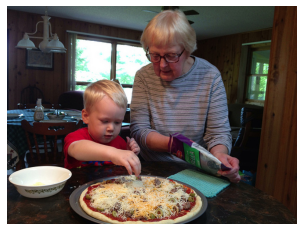

2371217
the woman who has a child wears glasses
the child who adds a shredded cheese wears a red shirt
the woman who has a child wears a red shirt
the child who adds a shredded cheese wears glasses


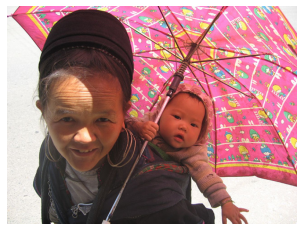

2347025
the woman who has a black hat wears hoops earrings
the child who has a pink hood holds an open umbrella
the woman who has a black hat holds an open umbrella
the child who has a pink hood wears hoops earrings


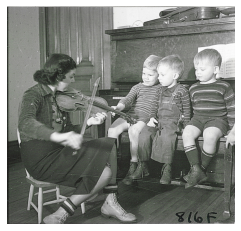

2414581
the woman who plays an old violin wears a dark skirt
the child who wears denim overalls wears a striped shirt
the woman who plays an old violin wears a striped shirt
the child who wears denim overalls wears a dark skirt


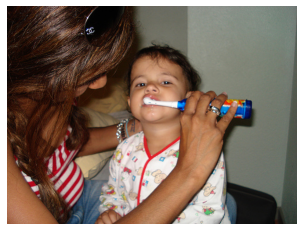

2411063
the woman who wears jeans has a finger
the child who wears pajamas has an electric toothbrush
the woman who wears jeans has an electric toothbrush
the child who wears pajamas has a finger



In [30]:
for pair in selected_pairs:
    if pair in entity_pair_ids:
        img_list = entity_pair_ids[pair]
    else:
        img_list = entity_ids[pair]
        
    print(pair)
    for id in img_list:
        utils.demo_by_img_id(id, rc_captions)
    print()